In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils import load_dataframe_csv

import matplotlib.pyplot as plt
from itertools import count

In [16]:
df1 = load_dataframe_csv('tables', 'Explainability_CIFAR10.csv')
df2 = load_dataframe_csv('tables', 'Explainability_OCEA.csv')
df3 = load_dataframe_csv('tables', 'Explainability_MRI.csv')
df4 = load_dataframe_csv('tables', 'Explainability_SVHN.csv')

In [17]:
df = pd.concat([df1, df2, df3, df4])
# mahtab
# df = pd.concat([df4])

In [18]:
df

,data,explainer,scale,coverage,hit_rate,execution_time
0,CIFAR10,YADEA,False,0.880000,0.44,12.880284
1,CIFAR10,YADEA,True,0.206667,0.00,4.767715
2,CIFAR10,RPS,False,0.123333,0.00,2.075059
3,CIFAR10,IF,True,0.130000,0.02,197.586558
4,CIFAR10,TracIn,True,0.126667,0.02,42.020625
...,...,...,...,...,...,...
145,SVHN,YADEA,False,0.523333,0.02,15.867550
146,SVHN,YADEA,True,0.670000,0.01,5.168205
147,SVHN,RPS,False,0.200000,0.01,1.574307
148,SVHN,IF,True,0.290000,0.00,90.604756


In [19]:
df['names'] = df['explainer'] +  ["*" if i else "" for i in df['scale'].to_list()]
df['names'][df['names']=='IF*'] = 'IF'
df['data'][df['data']=='OCEA'] = 'OCH'
df['names'] = df['names'].replace({'YADEA': 'HD-EXPLAIN', 'YADEA*': 'HD-Explain*'})


/tmp/ipykernel_85536/2132202268.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['names'][df['names']=='IF*'] = 'IF'
/tmp/ipykernel_85536/2132202268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [20]:
df

,data,explainer,scale,coverage,hit_rate,execution_time,names
0,CIFAR10,YADEA,False,0.880000,0.44,12.880284,HD-EXPLAIN
1,CIFAR10,YADEA,True,0.206667,0.00,4.767715,HD-Explain*
2,CIFAR10,RPS,False,0.123333,0.00,2.075059,RPS
3,CIFAR10,IF,True,0.130000,0.02,197.586558,IF
4,CIFAR10,TracIn,True,0.126667,0.02,42.020625,TracIn*
...,...,...,...,...,...,...,...
145,SVHN,YADEA,False,0.523333,0.02,15.867550,HD-EXPLAIN
146,SVHN,YADEA,True,0.670000,0.01,5.168205,HD-Explain*
147,SVHN,RPS,False,0.200000,0.01,1.574307,RPS
148,SVHN,IF,True,0.290000,0.00,90.604756,IF


In [21]:
grouped = df.groupby('names').agg({
    'coverage': ['mean', 'std'],
    'hit_rate': ['mean', 'std'],
    'execution_time': ['mean', 'std'],
})


In [22]:
result = pd.DataFrame({
    'coverage': grouped['coverage']['mean'].round(2).astype(str) + " ± " + grouped['coverage']['std'].round(2).astype(str),
    'hit_rate': grouped['hit_rate']['mean'].round(2).astype(str) + " ± " + grouped['hit_rate']['std'].round(2).astype(str),
    'execution_time': grouped['execution_time']['mean'].round(2).astype(str) + " ± " + grouped['execution_time']['std'].round(2).astype(str)
})

# Set the index to 'names'
result.index.name = 'names'


In [23]:
result

,coverage,hit_rate,execution_time
names,,,
HD-EXPLAIN,0.68 ± 0.15,0.26 ± 0.23,94.34 ± 126.26
HD-Explain*,0.55 ± 0.21,0.22 ± 0.23,9.48 ± 7.44
IF,0.28 ± 0.16,0.02 ± 0.02,990.18 ± 1236.73
RPS,0.22 ± 0.15,0.02 ± 0.02,4.25 ± 3.73
TracIn*,0.27 ± 0.16,0.02 ± 0.02,53.3 ± 27.48


In [24]:
# Optionally, generate a LaTeX table
latex_table = result.to_latex(column_format='|c|c|c|c|', header=True, index=True)
print(latex_table)

\begin{tabular}{|c|c|c|c|}
\toprule
 & coverage & hit_rate & execution_time \\
names &  &  &  \\
\midrule
HD-EXPLAIN & 0.68 ± 0.15 & 0.26 ± 0.23 & 94.34 ± 126.26 \\
HD-Explain* & 0.55 ± 0.21 & 0.22 ± 0.23 & 9.48 ± 7.44 \\
IF & 0.28 ± 0.16 & 0.02 ± 0.02 & 990.18 ± 1236.73 \\
RPS & 0.22 ± 0.15 & 0.02 ± 0.02 & 4.25 ± 3.73 \\
TracIn* & 0.27 ± 0.16 & 0.02 ± 0.02 & 53.3 ± 27.48 \\
\bottomrule
\end{tabular}



In [25]:
# combined = grouped.apply(lambda x: x['mean'].round(2).astype(str) + " ± " + x['std'].round(2).astype(str), axis=1)
# 
# # Generate LaTeX table
# latex_table = combined.to_latex(column_format='|c' + '|c' * len(combined.columns), header=True, index=True)
# 
# print(latex_table)

In [26]:
sns.__version__

'0.13.2'

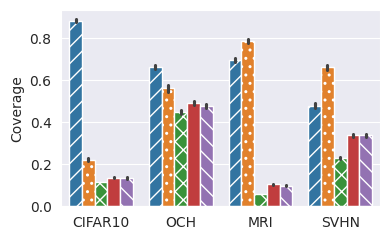

In [27]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='coverage', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,4)

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

sns.set_style("darkgrid")

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/flip_coverage.pdf', format='pdf')

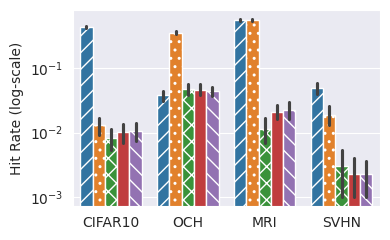

In [28]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='hit_rate', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,4)

sns.set_style("darkgrid")

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel("")
plt.ylabel('Hit Rate (log-scale)')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/flip_hitrate.pdf', format='pdf')

/tmp/ipykernel_85536/2497209861.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


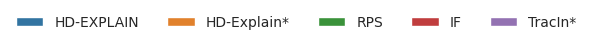

In [29]:
fig_leg = plt.figure(figsize=(6, 0.2))
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=5, frameon=False)
ax_leg.axis('off')
plt.tight_layout()
fig_leg.savefig('plots/bar_legend.pdf', format='pdf')

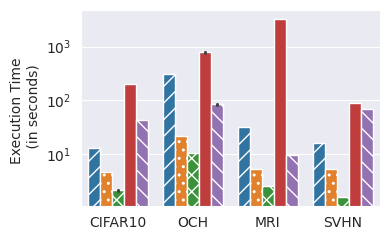

In [30]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='execution_time', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,4)
sns.set_style("darkgrid")

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel("")
plt.ylabel('Execution Time \n (in seconds)')

# plt.legend(bbox_to_anchor=(0.6, 0.50))

plt.tight_layout()
plt.savefig('plots/flip_time.pdf', format='pdf')

In [31]:
df1 = load_dataframe_csv('tables', 'Explainability_kernel_CIFAR10.csv')
df2 = load_dataframe_csv('tables', 'Explainability_kernel_OCEA.csv')
df3 = load_dataframe_csv('tables', 'Explainability_kernel_MRI.csv')
df4 = load_dataframe_csv('tables', 'Explainability_kernel_SVHN.csv')
df = pd.concat([df1, df2, df3, df4])
df['data'][df['data']=='OCEA'] = 'OCH'
df.head()

/tmp/ipykernel_85536/3407002072.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['data'][df['data']=='OCEA'] = 'OCH'
/tmp/ipykernel_85536/3407002072.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,data,kernel,scale,coverage,hit_rate,execution_time
0,CIFAR10,RBF,False,0.880000,0.44,13.156355
1,CIFAR10,IMQ,False,0.870000,0.45,13.120904
2,CIFAR10,Linear,False,0.746667,0.14,3.897154
3,CIFAR10,RBF,True,0.206667,0.00,4.732222
4,CIFAR10,IMQ,True,0.936667,0.14,4.810744


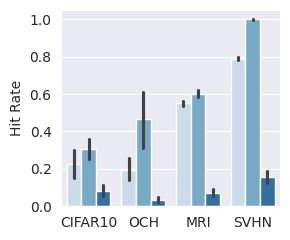

In [32]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='hit_rate', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)
sns.set_style("darkgrid")

plt.xlabel('')
plt.ylabel('Hit Rate')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/flip_kernel_hitrate.pdf', format='pdf')

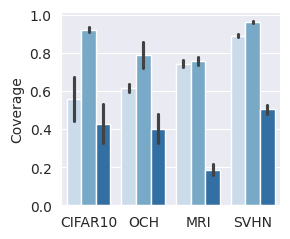

In [33]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='coverage', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)
sns.set_style("darkgrid")

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/flip_kernel_coverage.pdf', format='pdf')

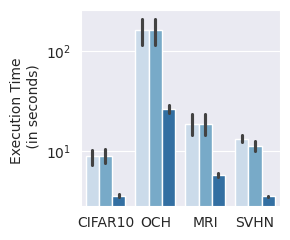

In [34]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='execution_time', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)
sns.set_style("darkgrid")

plt.xlabel('')
plt.ylabel('Execution Time \n (in seconds)')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/flip_kernel_time.pdf', format='pdf')

/tmp/ipykernel_85536/2462370678.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


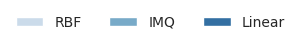

In [35]:
fig_leg = plt.figure(figsize=(3, 0.2))
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=3, frameon=False)
ax_leg.axis('off')
plt.tight_layout()
fig_leg.savefig('plots/kernel_bar_legend.pdf', format='pdf')

In [36]:
df1 = load_dataframe_csv('tables', 'Explainability_temperature_CIFAR10.csv')
df2 = load_dataframe_csv('tables', 'Explainability_temperature_OCEA.csv')
df3 = load_dataframe_csv('tables', 'Explainability_temperature_MRI.csv')
df4 = load_dataframe_csv('tables', 'Explainability_temperature_SVHN.csv')
df = pd.concat([df1, df2, df3, df4])
df['data'][df['data']=='OCEA'] = 'OCH'
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tables/Explainability_temperature_MRI.csv'

In [19]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.lineplot(data=df, x='temperature', y='coverage', hue='data')
# Define some hatches
# pattern=['//','..','xx','']
ax.set_xscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/temperature_hitrate.pdf', format='pdf')

ValueError: Could not interpret value `temperature` for parameter `x`

<Figure size 216x180 with 0 Axes>

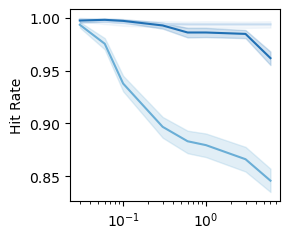

In [113]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.lineplot(df, x='temperature', y='hit_rate', hue='data', palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.set_xscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Hit Rate')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/temperature_hitrate.pdf', format='pdf')